**7/2/2020**

I hypothesize that adding additional strains of a species to a database will have a smaller impact on the number of significant PSMs identified by a search than adding additional species. To test this hypothesis, I will randomly add additional strains of *L. crispatus*, or additional species pulled from the Human Microbiome Sequencing Project to a database. I will run these tests on all the samples to reduce weird effects from a single sample. I will test 3 separate databases with 20, 40, 60, 80, or 100 additional random strains/species added. These random databases will be built on database containing the most PSMs-generating strain from 10 very common vaginal species. These are *G. swidsinskii GS10234, G.leopoldii UMB0912, P. lacrimalis UMB0411, G. vaginalis DNF01149, G. piotii UGhent 18.01, L. iners SPIN 1401G, Megasphaera genomospecies 1 UPII 199-6, P. timonensis DSM 22865, Lachnovaginosum,* and *L. crispatus JV-V01*.

In [1]:
from elliot_utils import *
import random

In [2]:
figPath = Path.cwd().joinpath('figures/species_vs_strain/')
analysisPath = Path.cwd().joinpath('analysis_files/species_vs_strain/')

In [3]:
# Create a list of 104 random species from the HMB list that do not overlap with the vaginal bacteria, and are all different genera
# (Because I have 104 strains of L. crispatus to choose from)
hmbFile = analysisPath.joinpath('hmb_species.csv') # HMB species
vaginalFile = analysisPath.joinpath('tailored_taxalist.csv') # Vaginal bacteria that I want to exclude
excludeGenera = set()
with vaginalFile.open(mode='r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        gen = getFirstWord(row[0])
        excludeGenera.add(gen)

In [3]:
### This and the following two blocks were used to pull random species from the hmb file and write them to 'random_species.csv', so they only need to be run once

#hmbSpecies = []
#with hmbFile.open(mode='r') as infile:
#    reader = csv.reader(infile)
#    for row in reader:
#        hmbSpecies.append(row[0])

In [4]:
#randomSpecies = []
#while len(randomSpecies) < 104:
#    r = random.randint(0, len(hmbSpecies) - 1)
#    gen = getFirstWord(hmbSpecies[r])
#    if gen in excludeGenera:
#        continue
#    else:
#        randomSpecies.append(hmbSpecies[r])
#        excludeGenera.add(gen)

In [5]:
#with analysisPath.joinpath('random_species.csv').open(mode='w', newline='') as outfile:
#    writer = csv.writer(outfile)
#    for species in randomSpecies:
#        writer.writerow([species])

Build random databases using the "speciesVSstrain.fasta" database as a baseline, and place them in the "7-8-20_NextflowMSGF_Combined_speciesVSstrains" folder.

In [6]:
dbPath = Path('../7-8-20_NextflowMSGF_Combined_speciesVSstrains/databases/')
baseDB = dbPath.joinpath('speciesVSstrain.fasta')
strainsPath = analysisPath.joinpath('lcrispatus_sequences/')
speciesPath = analysisPath.joinpath('random_hmb_sequences/')

In [7]:
# Reads in a fasta file and returns a list of protein objects contained inside
def getProteinsFromFasta(fastaFile):
    toReturn = []
    with fastaFile.open(mode='r') as database:
        entry = []
        completeEntries = []
        for line in database:
            if line[0] == '>' and entry != []:
                entry[0] = entry[0].replace('>', '')
                completeEntries.append(''.join(entry))
                entry = [line]
            else:
                entry.append(line)
        entry[0] = entry[0].replace('>', '')
        completeEntries.append(''.join(entry))
        for e in completeEntries:
            toReturn.append(Protein(e))
    return toReturn

# Condenses proteins in prots with the same amino acid sequence, then writes them out to the specified path
# Returns the number of proteins written to the new database
def writeProteinsToFile(prots, outPath):
    toWrite = {} # key=protein sequence, value = protein
    for prot in prots:
        if prot.sequence in toWrite.keys():
            for t in prot.taxa:
                toWrite[prot.sequence].addTaxa(t)
        else:
            toWrite[prot.sequence] = prot
    with outPath.open(mode='w', newline='') as outfile:
        for prot in toWrite.values():
            outfile.write(prot.getEntry())
    return len(toWrite)

In [8]:
### The following code blocks build the databases and only need to be run once

## Build the strain databases
#strainAssociator = {} # key=strain name, value=list of proteins for that strain
#strainNames = []
#strainAssociator['base'] = getProteinsFromFasta(baseDB)
#for strainFile in [x for x in strainsPath.iterdir() if x.suffix == '.fasta']:
#    identifier = strainFile.name.split('_')[1]
#    strainNames.append(identifier)
#    strainAssociator[identifier] = getProteinsFromFasta(strainFile)

In [9]:
#strSizes = [] # How many sequences are in each database
#for i in range(1, 6):
#    strSizes.append([])
#    num = i * 20
#    for j in range(3):
#        strainsCopy = strainNames.copy()
#        dbProts = []
#        for prot in strainAssociator['base']: # Build this db off the base db
#            dbProts.append(prot.copy())
#        for k in range(num): # Add 'num' additional strains
#            r = random.randint(0, len(strainsCopy) - 1)
#            for prot in strainAssociator[strainsCopy[r]]:
#                dbProts.append(prot.copy())
#            strainsCopy.remove(strainsCopy[r])
#        count = writeProteinsToFile(dbProts, dbPath.joinpath(f'str{str(num)}-{str(j)}.fasta'))
#        strSizes[i - 1].append(count)

In [10]:
## Write out database sizes to a csv file
#with analysisPath.joinpath('strainDBs_sizes.csv').open(mode='w', newline='') as outfile:
#    writer = csv.writer(outfile)
#    for row in strSizes:
#        writer.writerow(row)

In [11]:
## Build the species databases
#speciesAssociator = {} # key=species name, value=list of proteins for that species
#speciesNames = []
#speciesAssociator['base'] = getProteinsFromFasta(baseDB)
#for speciesFile in [x for x in speciesPath.iterdir() if x.suffix == '.fasta']:
#    identifier = speciesFile.name.split('_')[0]
#    speciesNames.append(identifier)
#    speciesAssociator[identifier] = getProteinsFromFasta(speciesFile)

In [12]:
#speSizes = [] # How many sequences are in each database
#for i in range(1, 6):
#    speSizes.append([])
#    num = i * 20
#    for j in range(3):
#        speciesCopy = speciesNames.copy()
#        dbProts = []
#        for prot in speciesAssociator['base']: # Build this db off the base db
#            dbProts.append(prot.copy())
#        for k in range(num): # Add 'num' additional species
#            r = random.randint(0, len(speciesCopy) - 1)
#            for prot in speciesAssociator[speciesCopy[r]]:
#                dbProts.append(prot.copy())
#            speciesCopy.remove(speciesCopy[r])
#        count = writeProteinsToFile(dbProts, dbPath.joinpath(f'spe{str(num)}-{str(j)}.fasta'))
#        speSizes[i - 1].append(count)

In [13]:
## Write out database sizes to a csv file
#with analysisPath.joinpath('speciesDBs_sizes.csv').open(mode='w', newline='') as outfile:
#    writer = csv.writer(outfile)
#    for row in speSizes:
#        writer.writerow(row)

In [14]:
# Generate data on database size
typeLabels = ['Strain' for x in range(15)]
typeLabels.extend(['Species' for x in range(15)])
countLabels = [20,20,20,40,40,40,60,60,60,80,80,80,100,100,100,20,20,20,40,40,40,60,60,60,80,80,80,100,100,100]
seqNumbers = []
with analysisPath.joinpath('strainDBs_sizes.csv').open(mode='r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        for value in row:
            seqNumbers.append(int(value))
with analysisPath.joinpath('speciesDBs_sizes.csv').open(mode='r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        for value in row:
            seqNumbers.append(int(value))
seqDF = pd.DataFrame({'Sequences in Database':seqNumbers, 'Database Type':typeLabels, 'Additional Individuals':countLabels})

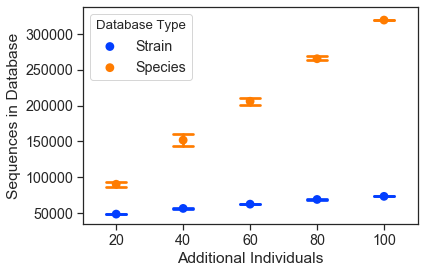

In [15]:
seqGraph = sns.pointplot(x='Additional Individuals', y='Sequences in Database', hue='Database Type', data=seqDF, join=False, capsize=0.3)
saveFig(seqGraph, figPath.joinpath('size_comparison.png'))

Searching six sample files against all 31 databases generated a huge amount of results, so I'll determine the number of signficant human and bacterial PSMs in each result file, then write that to a local CSV to save space, and make it so I don't have to re-analyze all those results again.

In [16]:
resPath = Path.cwd().joinpath('../7-8-20_NextflowMSGF_Combined_speciesVSstrains/output_processed/')
countPath = analysisPath.joinpath('psm_counts_processed.csv')

In [9]:
### This code and the following 2 cells have been run and the results stored in 'psm_counts.csv'

## Get a list of allowed peptides for each database
#resDict = {} # key=db identifer, value=list of result files for that db
#for res in [x for x in resPath.iterdir() if x.suffix == '.tsv']: # Group result files by database they came from
#    resName = res.name.split('.')[0]
#    dbName = resName[56:]
#    if not dbName in resDict.keys():
#        resDict[dbName] = []
#    resDict[dbName].append(res)
#
#allowedDict = {} # key=db identifier, value=set of allowed peptides
#for dbid, resList in resDict.items(): # Get the filtered list of human & bacterial peptides for each set of results
#    allowedPeps = getFilteredPeptides(resList, 'bacteria')
#    allowedPeps.update(getFilteredPeptides(resList, 'human'))
#    allowedDict[dbid] = allowedPeps

In [10]:
# The PSM count files have been generated so this code and the following block do not need to be run again

#psmCounts = []
#sampleNums = []
#dbTypes = []
#for res in [x for x in resPath.iterdir() if x.suffix == '.tsv']:
#    sampleNums.append(res.name[:4])
#    resName = res.name.split('.')[0]
#    dbName = resName[56:]
#    if dbName == 'speciesVSstrain':
#        dbTypes.append('baseline')
#    else:
#        dbTypes.append(dbName)
#    allowedPeps = allowedDict[dbName]
#    count = 0
#    with res.open(mode='r') as infile:
#        reader = csv.reader(infile, delimiter='\t')
#        for row in reader:
#            protType = determineHitType(row)
#            if protType == 'first':
#                continue
#            if not isSignificant(row):
#                break
#            if protType == 'bacteria' or protType == 'human' and row[PEPTIDE] in allowedPeps:
#                count += 1
#    psmCounts.append(count)
#    print(f'Finished with {res.name}')

In [11]:
#resultDF = pd.DataFrame({'sample':sampleNums, 'database':dbTypes, 'psms':psmCounts})
#resultDF.to_csv(path_or_buf=countPath)

I'm treating the 3 separate databases at each size step as biological replicates and the 6 different samples as technical replicates. So I'll take the average fold change for each database across all 6 samples, then plot the 3 points for each category of database that represent those average fold-changes.

In [17]:
# Read in the data
resultDF = pd.read_csv(filepath_or_buffer=countPath)

In [18]:
# Pull out the psms for the baseline database for each sample
baselines = {} # key=sample, value=number of significant psms generated by baseline db
for index, row in resultDF.iterrows():
    if row['database'] == 'baseline':
        baselines[row['sample']] = row['psms']

In [19]:
# Get fold changes for all the databases
strDBs = ['str20-0', 'str20-1', 'str20-2', 'str40-0', 'str40-1', 'str40-2', 'str60-0', 'str60-1', 'str60-2', 'str80-0', 'str80-1', 'str80-2', 'str100-0', 'str100-1', 'str100-2']
speDBs = ['spe20-0', 'spe20-1', 'spe20-2', 'spe40-0', 'spe40-1', 'spe40-2', 'spe60-0', 'spe60-1', 'spe60-2', 'spe80-0', 'spe80-1', 'spe80-2', 'spe100-0', 'spe100-1', 'spe100-2']
strChanges = [[] for x in range(len(strDBs))]
speChanges = [[] for x in range(len(speDBs))]
for index, row in resultDF.iterrows():
    loc = -1
    toAppend = None
    if row['database'].find('str') != -1:
        loc = strDBs.index(row['database'])
        toAppend = strChanges
    elif row['database'].find('spe') != -1:
        loc = speDBs.index(row['database'])
        toAppend = speChanges
    else:
        continue
    delta = row['psms'] / baselines[row['sample']]
    toAppend[loc].append(delta)

In [20]:
# Take average fold change for each database across all 6 samples
strAvgChanges = []
speAvgChanges = []
for i in range(len(strChanges)):
    strAvgChanges.append(np.average(strChanges[i]))
    speAvgChanges.append(np.average(speChanges[i]))

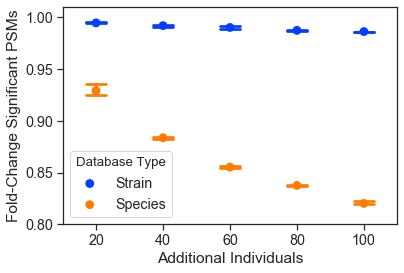

In [21]:
countDF = pd.DataFrame({'Fold-Change Significant PSMs':strAvgChanges + speAvgChanges, 'Database Type':typeLabels, 'Additional Individuals':countLabels})
countGraph = sns.pointplot(x='Additional Individuals', y='Fold-Change Significant PSMs', hue='Database Type', data=countDF, join=False, capsize=0.3)
countGraph.set(ylim=(0.8, 1.01))
saveFig(countGraph, figPath.joinpath('psms_comparison.png'))